In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import statsmodels.api as sm

In [3]:
df=pd.read_csv('C:/Users/user/TEST3/csv파일/데이터셋_2_2(EPDO1).csv',encoding='cp949')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   사고유형         58059 non-null  int64
 1   연령가해자        58059 non-null  int64
 2   법규위반가해자      58059 non-null  int64
 3   행동유형가해자      58059 non-null  int64
 4   피해자신체상해주부위   58059 non-null  int64
 5   차량용도가해자_중분류  58059 non-null  int64
 6   도로종류         58059 non-null  int64
 7   도로형태         58059 non-null  int64
 8   도로선형         58059 non-null  int64
 9   발생시각         58059 non-null  int64
 10  EPDO1        58059 non-null  int64
dtypes: int64(11)
memory usage: 4.9 MB


# ■ 스피어만 상관분석 테스트
### ▶ 순서척도로 바꾼 뒤 상관분석(척도의 형태를 고려하여 스피어만 사용)을 하여도 결과가 좋지 않음

In [5]:
cor_data = df.corr(method='spearman')

<AxesSubplot:>

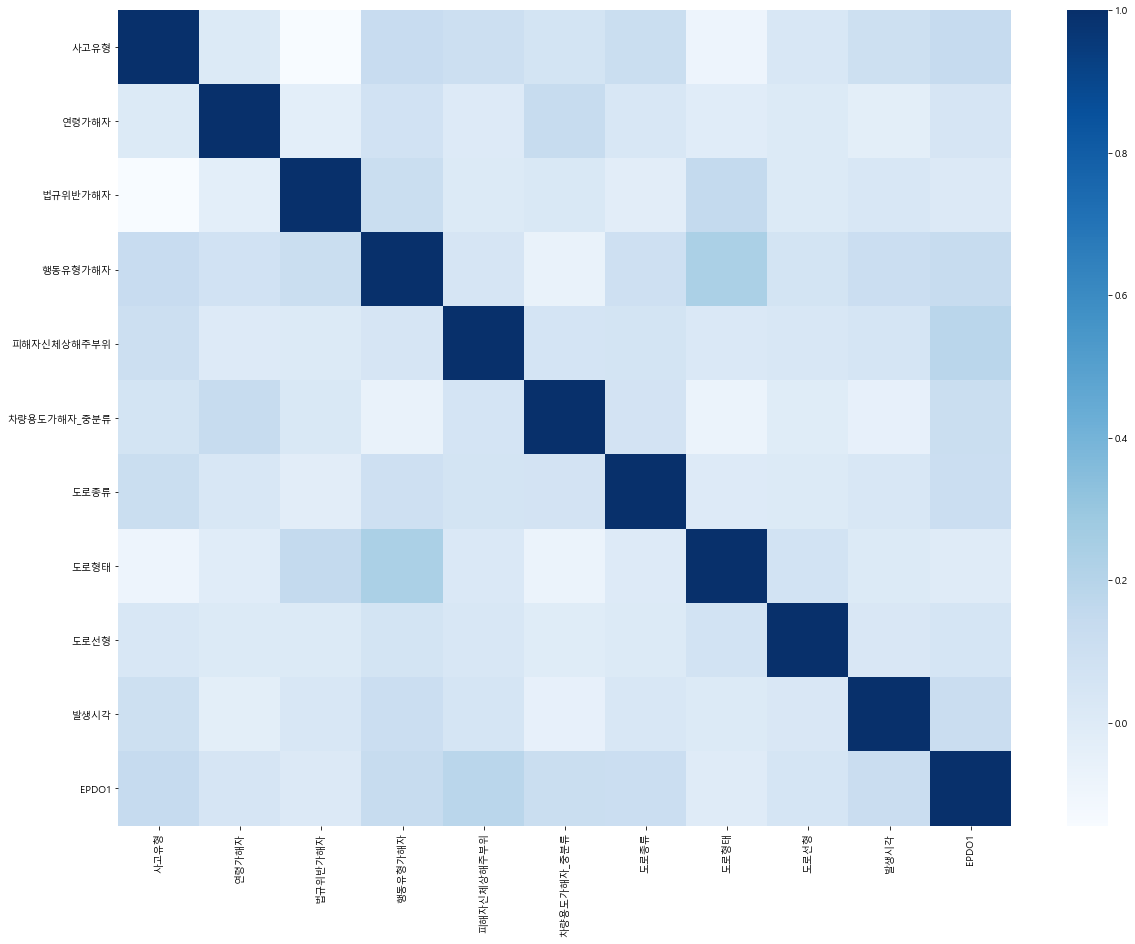

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

# 한글 폰트 깨지는 것 때문에 추가함
import matplotlib
from matplotlib import font_manager, rc
import platform

matplotlib.rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,15))
sns.heatmap(cor_data, cbar = True, annot = False, square = False, cmap = 'Blues')

---

---

# 전체 변수들과의 ols 회귀분석 진행
### 설명변수(X)와 타겟변수(Y)를 분리/학습데이터와 평가데이터를 분할
##### Split Data Set Shape 출력물

In [7]:
y=df['EPDO1']

In [8]:
feature_columns = df.columns.difference(["EPDO1"]) # Target column 빼기

X=df.drop(['EPDO1'],axis=1)
y=pd.DataFrame(df['EPDO1'])

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(40641, 10) (17418, 10) (40641, 1) (17418, 1)


# train & OLS 회귀모델 적합

In [9]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              1937.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        16:59:35   Log-Likelihood:                     -2.2685e+05
No. Observations:               40641   AIC:                                  4.537e+05
Df Residuals:                   40631   BIC:                                  4.538e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.9907      0.183      5.419      0.000       0.632       1.349
연령가해자          -1.8599      0.198     -9.380      0.000      -2.248      -1.471
법규위반가해자         0.6649      0.257      2.584      0.010       0.161       1.169
행동유형가해자         2.1939      0.137     16.000      0.000       1.925       2.463
피해자신체상해주부위      2.0270      0.061     33.126      0.000       1.907       2.147
차량용도가해자_중분류     1.0450      0.088     11.868      0.000       0.872       1.218
도로종류            5.3128      0.259     20.531      0.000       4.806       5.820
도로형태           -5.6742      0.394    -14.392      0.000      -6.447      -4.901
도로선형            0.5195      0.580      0.896      0.370      -0.617       1.656
발생시각            3.1070      0.165     18.793      0.000       2.783       3.431
==============================================================================
Omnibus:                    24963.023   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           204283.327
Skew:                           2.987   Prob(JB):                         0.00
Kurtosis:                      12.216   Cond. No.                         29.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 유의하지 않은 '도로선형' 컬럼 삭제

In [13]:
X = X.drop(['도로선형'],axis=1)

# OLS 모델 재진행

In [14]:
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              2153.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        17:02:05   Log-Likelihood:                     -2.2711e+05
No. Observations:               40641   AIC:                                  4.542e+05
Df Residuals:                   40632   BIC:                                  4.543e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.9756      0.184      5.297      0.000       0.615       1.337
연령가해자          -1.9879      0.198    -10.029      0.000      -2.376      -1.599
법규위반가해자         0.6976      0.256      2.728      0.006       0.196       1.199
행동유형가해자         2.1942      0.138     15.895      0.000       1.924       2.465
피해자신체상해주부위      2.1357      0.062     34.693      0.000       2.015       2.256
차량용도가해자_중분류     1.2215      0.088     13.864      0.000       1.049       1.394
도로종류            5.4089      0.260     20.767      0.000       4.898       5.919
도로형태           -5.9590      0.387    -15.385      0.000      -6.718      -5.200
발생시각            2.9027      0.166     17.506      0.000       2.578       3.228
==============================================================================
Omnibus:                    26195.311   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273021.922
Skew:                           3.070   Prob(JB):                         0.00
Kurtosis:                      14.114   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ▶ y 예측값
####  → 소수 첫째자리에서 반올림해서 나타내겠음 

In [15]:
pred_y = fitted_full_model.predict(test_x)
pred_y = pd.DataFrame(pred_y)
pred_y.rename(columns ={0:'y예측'},inplace=True)

for i in range(len(pred_y)):
     pred_y.iloc[i] = int(pred_y.iloc[i])
     pred_y.iloc[i] =  round(pred_y.iloc[i],0)

In [16]:
pred_y

,y예측
2923,59.0
8594,64.0
57202,67.0
7407,58.0
6064,44.0
...,...
40842,42.0
50241,45.0
11433,33.0
49389,42.0


In [17]:
cnt = pred_y['y예측'].value_counts()
cnt = pd.DataFrame(cnt)
cnt.transpose()

,35.0,36.0,33.0,40.0,45.0,41.0,43.0,34.0,37.0,31.0,...,96.0,95.0,-13.0,-15.0,104.0,-11.0,105.0,103.0,100.0,99.0
y예측,417,405,393,385,385,380,376,374,370,360,...,2,2,1,1,1,1,1,1,1,1


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, '-15.0'),
  Text(1, 0, '-13.0'),
  Text(2, 0, '-11.0'),
  Text(3, 0, '-9.0'),
  Text(4, 0, '-8.0'),
  Text(5, 0, '-7.0'),
  Text(6, 0, '-6.0'),
  Text(7, 0, '-5.0'),
  Text(8, 0, '-4.0'),
  Text(9, 0, '-3.0'),
  Text(10, 0, '-2.0'),
  Text(11, 0, '-1.0'),
  Text(12, 0, '0.0'),
  Text(13, 0, '1.0'),
  Text(14, 0, '2.0'),
  Text(15, 

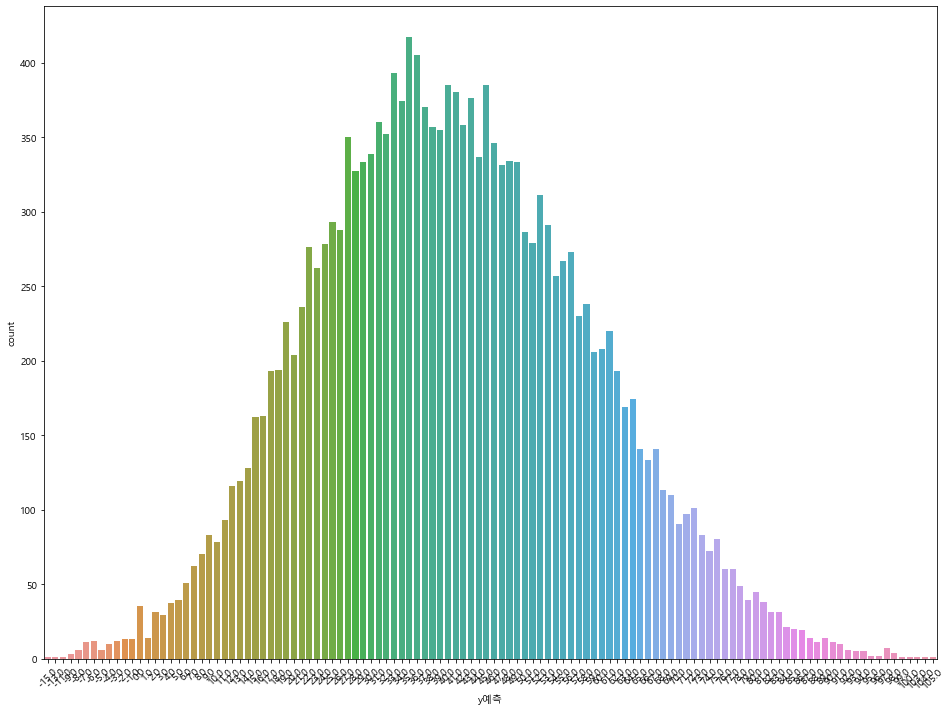

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=pred_y, x="y예측", ax=ax1)
plt.xticks(rotation=45)

---

---

## ★상수항이 없는 회귀방정식★   
#### 일반적으로 회귀모델에서는 '상수항'을 포함해야한다.
#### 그러나 사망자수, 중상자수, 경상자수, 부상신고자수 로 구성된 EPDO 값 특성상  사고가 발생하지 않으면 EPDO의 값은 0이 도출된다.
#### 따라서 독립변수들의 계수가 0이면 (사고가 발생하지 않으면) 종속변수의 값도 0이라는 가설(상수항이 없는  회귀)을 세워 두가지 케이스를 보겠다.

---

# ■ 최적의 OLS 모델 선택



# Case.1 상수항 추가

# 0.변수선택법

In [20]:
feature_columns = train_x.columns.difference(["EPDO1"])

In [21]:
train_x1= sm.add_constant(train_x, has_constant='add')

In [22]:
#변수 선택법
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(x=train_x1,y=train_y,feature_set=feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321854F0>, 'AIC': 454242.82409956516}


In [23]:
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel

In [24]:
print(getBest(x=train_x1,y=train_y,k=2))

Processed 36 models on 2 predictors in 0.21772193908691406 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                 455509
Name: 6, dtype: object


In [25]:
#변수 선택에 따른 학습시간과 저장 K 반복
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(train_x1,train_y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

Processed 9 models on 1 predictors in 0.05063438415527344 seconds.
Processed 36 models on 2 predictors in 0.2075505256652832 seconds.
Processed 84 models on 3 predictors in 0.625556468963623 seconds.
Processed 126 models on 4 predictors in 1.2219271659851074 seconds.
Total elapsed time :  2.2681007385253906 seconds
             AIC                                              model
1  456338.214874  <statsmodels.regression.linear_model.Regressio...
2  455508.929951  <statsmodels.regression.linear_model.Regressio...
3  454834.701801  <statsmodels.regression.linear_model.Regressio...
4  454269.779088  <statsmodels.regression.linear_model.Regressio...


In [26]:
models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  EPDO1   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     1028.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:05:05   Log-Likelihood:            -2.2713e+05
No. Observations:               40641   AIC:                         4.543e+05
Df Residuals:                   40636   BIC:                         4.543e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
도로종류            7.0086      0.261     26.899      0.000       6.498       7.519
발생시각            4.5804      0.169     27.060      0.000       4.249       4.912
차량용도가해자_중분류     2.1055      0.088     23.892      0.000       1.933       2.278
피해자신체상해주부위      2.4551      0.062     39.831      0.000       2.334       2.576
const         -26.1543      1.201    -21.777      0.000     -28.508     -23.800
==============================================================================
Omnibus:                    25465.094   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255070.447
Skew:                           2.969   Prob(JB):                         0.00
Kurtosis:                      13.741   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.전진선택법

In [27]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['const'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['const']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(train_x1,train_y)
 
print(forwordBestModel.summary())

Processed  9 models on 1 predictors in 0.06066155433654785
Selected predictors: ['피해자신체상해주부위', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321EA8B0>
Processed  8 models on 2 predictors in 0.05013322830200195
Selected predictors: ['피해자신체상해주부위', '도로종류', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321854F0>
Processed  7 models on 3 predictors in 0.052138328552246094
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321EAE80>
Processed  6 models on 4 predictors in 0.05514717102050781
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '차량용도가해자_중분류', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321EAEE0>
Processed  5 models on 5 predictors in 0.06667757034301758
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '차량용도가해자_중분류', '행동유형가

# 2.후진제거법

In [28]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x1,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(train_x1,train_y)
print(backwardBestModel.summary())

Processed 9 models on 8 predictors in 0.12893176078796387
Selected predictors : ['도로종류', '발생시각', '법규위반가해자', '사고유형', '연령가해자', '차량용도가해자_중분류', '피해자신체상해주부위', '행동유형가해자', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321F7580>
Processed 8 models on 7 predictors in 0.09376311302185059
Selected predictors : ['도로종류', '발생시각', '법규위반가해자', '사고유형', '차량용도가해자_중분류', '피해자신체상해주부위', '행동유형가해자', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321F7D30>
Processed 7 models on 6 predictors in 0.07813429832458496
Selected predictors : ['도로종류', '발생시각', '법규위반가해자', '차량용도가해자_중분류', '피해자신체상해주부위', '행동유형가해자', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321F7B50>
Total elapsed time : 0.3611562252044678 seconds.
                            OLS Regression Results                            
Dep. Variable:                  EPDO1   R-squared:                       0.109
Mod

# 3.단계적선택법

In [29]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(train_x1,train_y)
print(stepwiseBestModel.summary())

Processed  9 models on 1 predictors in 0.049130916595458984
Selected predictors: ['피해자신체상해주부위', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321E3760>
forward
Processed 1 models on 0 predictors in 0.004010915756225586
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C31E42BB0>
Processed  8 models on 2 predictors in 0.04612302780151367
Selected predictors: ['피해자신체상해주부위', '도로종류', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321F0C10>
forward
Processed 2 models on 1 predictors in 0.009525775909423828
Selected predictors : ['피해자신체상해주부위', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321E0AF0>
Processed  7 models on 3 predictors in 0.04812741279602051
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionRes

# Case.2 상수항 없고 원점을 지나는 회귀모델

# 0.변수선택법

In [31]:
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['사고유형']),k): 
        combo=(list(combo)+['사고유형'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel

print(getBest(x=train_x,y=train_y,k=2))

Processed 28 models on 2 predictors in 0.2591886520385742 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                 455328
Name: 5, dtype: object


In [32]:
#변수 선택에 따른 학습시간과 저장 K 반복
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(train_x1,train_y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

Processed 9 models on 1 predictors in 0.07519912719726562 seconds.
Processed 36 models on 2 predictors in 0.27611708641052246 seconds.
Processed 84 models on 3 predictors in 0.8759880065917969 seconds.
Processed 126 models on 4 predictors in 1.5856881141662598 seconds.
Total elapsed time :  2.9383254051208496 seconds
             AIC                                              model
1  456467.099772  <statsmodels.regression.linear_model.Regressio...
2  455328.268367  <statsmodels.regression.linear_model.Regressio...
3  454812.845201  <statsmodels.regression.linear_model.Regressio...
4  454677.809087  <statsmodels.regression.linear_model.Regressio...


In [33]:
models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.315
Model:                            OLS   Adj. R-squared (uncentered):              0.315
Method:                 Least Squares   F-statistic:                              3745.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        17:07:13   Log-Likelihood:                     -2.2733e+05
No. Observations:               40641   AIC:                                  4.547e+05
Df Residuals:                   40636   BIC:                                  4.547e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
도로종류           5.0046      0.252     19.833      0.000       4.510       5.499
발생시각           2.5142      0.158     15.954      0.000       2.205       2.823
피해자신체상해주부위     2.0430      0.060     34.323      0.000       1.926       2.160
행동유형가해자        1.2914      0.110     11.715      0.000       1.075       1.507
사고유형           0.9204      0.182      5.058      0.000       0.564       1.277
==============================================================================
Omnibus:                    26705.866   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           285006.908
Skew:                           3.145   Prob(JB):                         0.00
Kurtosis:                      14.347   Cond. No.                         8.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1. 전진선택법

In [35]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['사고유형'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['사고유형']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['사고유형']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != '사고유형']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(train_x,train_y)
 
print(forwordBestModel.summary())

Processed  8 models on 1 predictors in 0.05465102195739746
Selected predictors: ['피해자신체상해주부위', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321EA220>
Processed  7 models on 2 predictors in 0.04633784294128418
Selected predictors: ['피해자신체상해주부위', '도로종류', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C32185C10>
Processed  6 models on 3 predictors in 0.07813286781311035
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321EA670>
Processed  5 models on 4 predictors in 0.0803067684173584
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '행동유형가해자', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321EA2B0>
Processed  4 models on 5 predictors in 0.06666731834411621
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '행동유형가해자', '도로형태', '사고유형'] AIC 

# 2. 후진제거법

In [37]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['사고유형']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['사고유형'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != '사고유형']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(train_x,train_y)
print(backwardBestModel.summary())

Processed 8 models on 7 predictors in 0.16079092025756836
Selected predictors : ['도로종류', '도로형태', '발생시각', '연령가해자', '차량용도가해자_중분류', '피해자신체상해주부위', '행동유형가해자', '사고유형']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C32199760>
Processed 7 models on 6 predictors in 0.1239631175994873
Selected predictors : ['도로종류', '도로형태', '발생시각', '차량용도가해자_중분류', '피해자신체상해주부위', '행동유형가해자', '사고유형']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321B69A0>
Total elapsed time : 0.36755990982055664 seconds.
                                 OLS Regression Results                                
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              2421.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00


# 단계적선택법

In [41]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['사고유형'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['사고유형']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != '사고유형']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != '사고유형']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(train_x,train_y)
print(stepwiseBestModel.summary())

Processed  8 models on 1 predictors in 0.0521390438079834
Selected predictors: ['피해자신체상해주부위', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C321F09A0>
forward
Processed 1 models on 0 predictors in 0.00812387466430664
Selected predictors : ['사고유형']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C3207CDC0>
Processed  7 models on 2 predictors in 0.04688000679016113
Selected predictors: ['피해자신체상해주부위', '도로종류', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C31F85430>
forward
Processed 2 models on 1 predictors in 0.015627622604370117
Selected predictors : ['피해자신체상해주부위', '사고유형']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001C3208AF10>
Processed  6 models on 3 predictors in 0.06250667572021484
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrap